In [1]:
from pycoingecko import CoinGeckoAPI
from pprint import pprint
import pandas as pd


from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
cg = CoinGeckoAPI()

In [3]:
pages = [1, 2, 3, 4, 5]

coins = []
for page in pages:
    results = cg.get_coins_markets("usd", page=page)
    for coin in results:
        coins.append(coin)

In [92]:
df = pd.DataFrame(columns=["Name", "Symbol", "Price", "MarketCap", "FullyDilutedValuation", "Rank", "Volume", "ATHChangePercent"])

for idx, coin in enumerate(coins):
    # print(coin["id"], coin["market_data"]["current_price"]["usd"], coin["market_data"]["market_cap"]["usd"], coin["market_data"]["total_volume"]["usd"])
    df.loc[idx] = [coin["name"], coin["symbol"].upper(), coin["current_price"], coin["market_cap"], coin["fully_diluted_valuation"], coin["market_cap_rank"], coin["total_volume"], coin["ath_change_percentage"]]

In [93]:
df["MarketCap"] /= 1e9
df["FullyDilutedValuation"] /= 1e9

df["FDVtoMCAP_Ratio"] = df["FullyDilutedValuation"] / df["MarketCap"]

$$ D_R = min(FDV/DV), C_P = min(ATH\%Change) $$

$$ R = D_R + C_P $$

In [94]:
df["FDVtoMCAP_Ratio_norm"] = df["FDVtoMCAP_Ratio"] / df["FDVtoMCAP_Ratio"].max()
df["ATHChangePercent_norm"] = abs(df["ATHChangePercent"]) / abs(df["ATHChangePercent"]).max()

In [104]:
a = 3
b = 1e-9
df["Rank"] = (a * df["FDVtoMCAP_Ratio_norm"] + df["ATHChangePercent_norm"])
df[df["Volume"] > 100e6].sort_values("Rank", ascending=True)[:50]

,Name,Symbol,Price,MarketCap,FullyDilutedValuation,Rank,Volume,ATHChangePercent,FDVtoMCAP_Ratio,FDVtoMCAP_Ratio_norm,ATHChangePercent_norm
22,Near,NEAR,14.64,8.727081,14.56088,0.173976,670814652,-10.83447,1.668471,0.021877,0.108345
13,Polygon,MATIC,2.54,17.443069,25.379525,0.186959,1954550161,-12.97252,1.454992,0.019078,0.129725
204,DUSK Network,DUSK,0.992461,0.386304,0.992218,0.190669,180493112,-8.96339,2.568492,0.033678,0.089634
21,Dai,DAI,1.0,8.965452,8.965452,0.219304,464784256,-17.99676,1.0,0.013112,0.179968
94,Oasis Network,ROSE,0.389619,1.359772,3.896195,0.250642,320137087,-13.79305,2.86533,0.03757,0.137930
2,Binance Coin,BNB,520.44,87.524128,87.524128,0.280853,1550567857,-24.15163,1.0,0.013112,0.241516
184,FLEX Coin,FLEX,5.76,0.453045,0.568125,0.287484,1082624623,-23.81561,1.254014,0.016443,0.238156
8,Terra,LUNA,84.83,30.737816,84.831124,0.287643,2322530907,-17.90817,2.759829,0.036187,0.179082
0,Bitcoin,BTC,47396,895.258414,993.967373,0.358069,25248247765,-31.43954,1.110258,0.014558,0.314395
16,Wrapped Bitcoin,WBTC,47423,12.220978,12.220978,0.368918,280979736,-32.95822,1.0,0.013112,0.329582


,Name,Symbol,Price,MarketCap,FullyDilutedValuation,Rank,Volume,ATHChangePercent,FDVtoMCAP_Ratio,FDVtoMCAP_Ratio_norm,ATHChangePercent_norm
260,Metis Token,METIS,186.65,271923668,1880011470,0.092939,64684468,-0.22852,6.913747,0.090654,0.002285
401,Ion,ION,6290.61,133952195,133952195,0.096523,333795,-8.34106,1.0,0.013112,0.083411
119,Frax Share,FXS,26.47,941231084,2635355004,0.097876,17800206,-6.11634,2.799902,0.036713,0.061163
131,Fei USD,FEI,0.998534,829927533,830479727,0.112092,23329606,-9.89716,1.000665,0.013121,0.098972
410,Railgun,RAIL,2.56,127751151,255502303,0.123289,3532402,-9.70647,2.0,0.026224,0.097065
204,DUSK Network,DUSK,0.992461,386303741,992218126,0.123312,180493112,-8.96339,2.568492,0.033678,0.089634
83,Frax,FRAX,1.01,1749572715,1749572715,0.129194,26434383,-11.60821,1.0,0.013112,0.116082
22,Near,NEAR,14.64,8727081231,14560879986,0.130222,670814652,-10.83447,1.668471,0.021877,0.108345
74,Convex Finance,CVX,46.6,2041577306,4659577161,0.136557,58840569,-10.66305,2.282342,0.029926,0.106631
13,Polygon,MATIC,2.54,17443068506,25379524609,0.148803,1954550161,-12.97252,1.454992,0.019078,0.129725


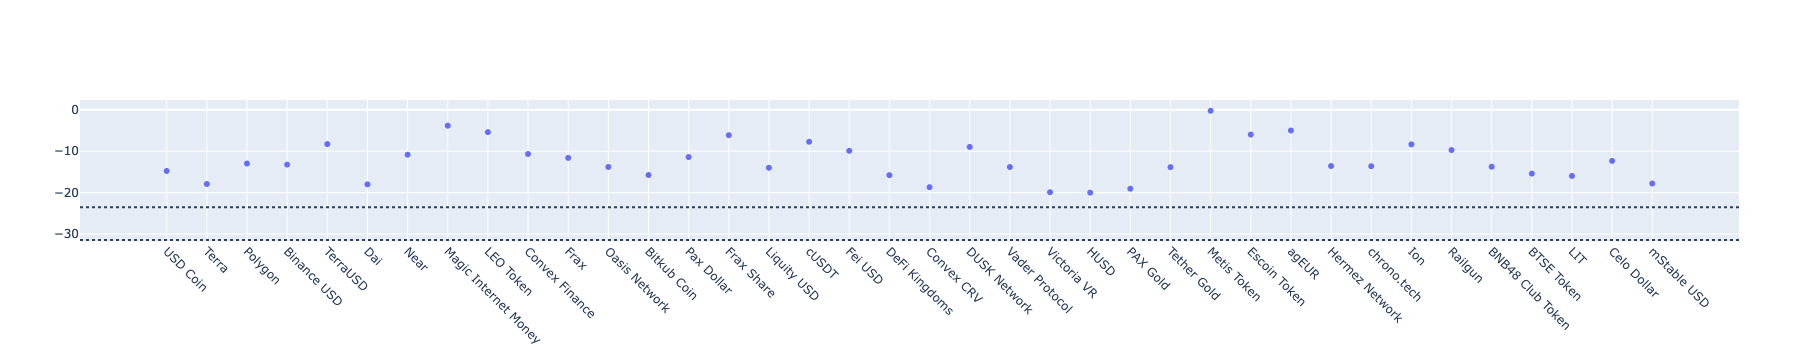

In [107]:
fig = go.Figure()

df1 = df[df.ATHChangePercent > -20]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))
fig.add_hline(
    y=df.iloc[0].ATHChangePercent,
    line_dash="dot",
)
fig.add_hline(
    y=df.iloc[1].ATHChangePercent,
    line_dash="dot",
)
#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

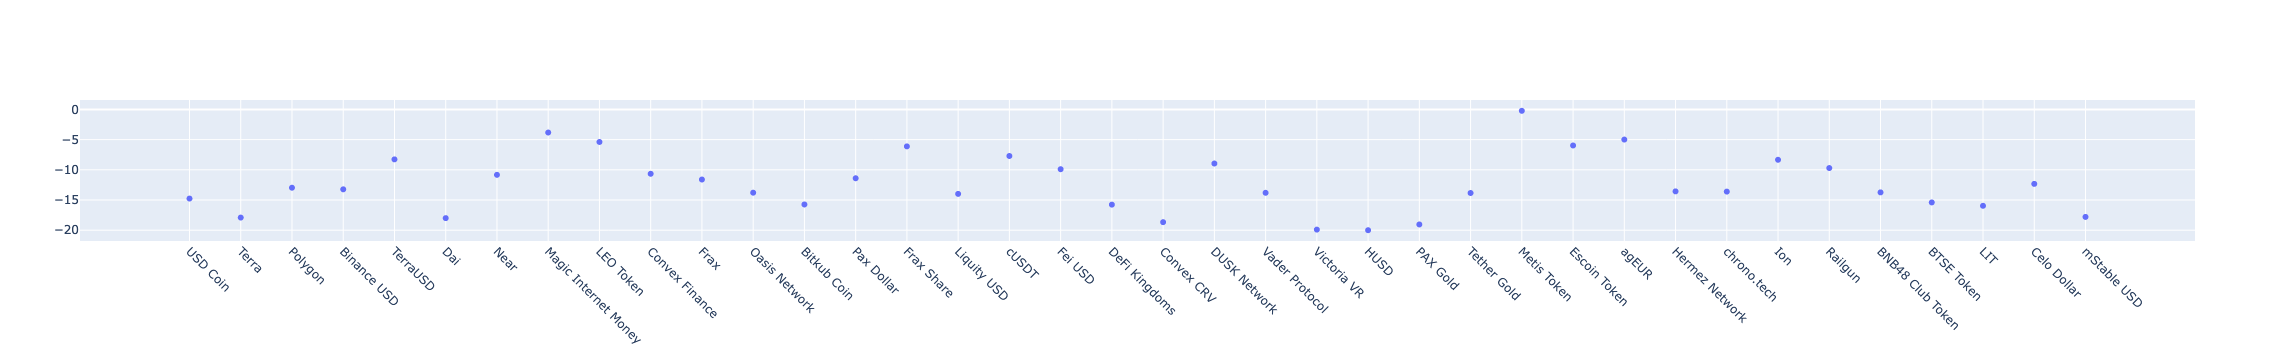

In [7]:
fig = go.Figure()

df1 = df[(df.ATHChangePercent > -20)]
fig.add_trace(go.Scatter(x=df1.Name, y=df1.ATHChangePercent.round(2), mode='markers'))

#fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

In [8]:
df["VolumeMarketCapRatio"] = df["Volume"] / df["MarketCap"]

In [9]:
df.sort_values("VolumeMarketCapRatio", ascending=False)

,Name,Price,MarketCap,Rank,Volume,ATHChangePercent,VolumeMarketCapRatio
337,GXChain,2.44,180917515,338,771998376,-77.01147,4.267129
184,FLEX Coin,5.76,453045215,185,1082624623,-23.81561,2.389661
475,APENFT,0.000003,93653418,476,197634235,-63.48180,2.110273
439,Voxies,3.17,114005388,440,188076665,-32.61316,1.649717
453,Harvest Finance,164.85,105769907,454,128682430,-96.75399,1.216626
...,...,...,...,...,...,...,...
79,Bitcoin Cash ABC,95.97,1803694806,81,850.71,-74.61861,0.0
494,Doge Army Token,0.0,88273797,495,22.44,-94.59884,0.0
398,Iron Bank EURO,1.13,135975249,399,0.0,-36.07787,0.0
335,Ankr Reward-Bearing Staked ETH,3426.16,182201557,336,0.0,-27.61330,0.0


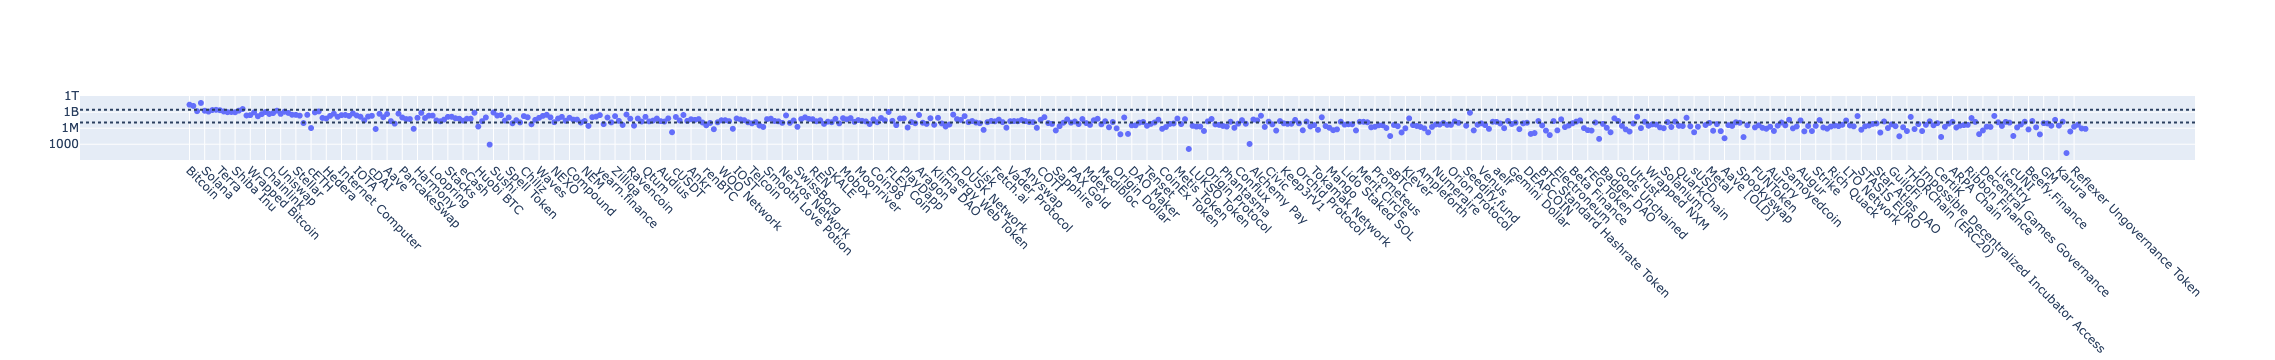

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.Volume, mode='markers'))
fig.add_hline(
    y=df.Volume.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.Volume.median() + df.Volume.std(),
    line_dash="dot",
)

fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)

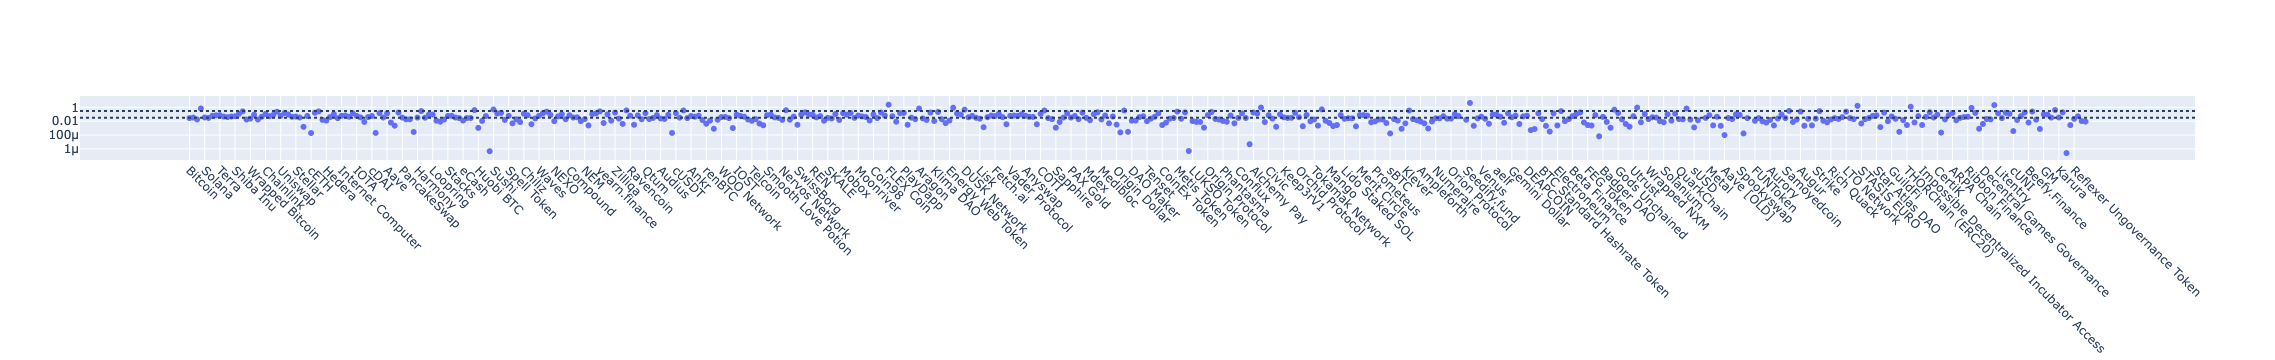

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.Name, y=df.VolumeMarketCapRatio, mode='markers'))
fig.add_hline(
    y=df.VolumeMarketCapRatio.median(),
    line_dash="dot",
)
fig.add_hline(
    y=df.VolumeMarketCapRatio.median() + df.VolumeMarketCapRatio.std(),
    line_dash="dot",
)
fig.update_yaxes(type="log")
fig.update_xaxes(tickangle=45)